In [39]:
import json
import pandas as pd
import numpy as np

import preprocessor as p
import statistics as s
import gmplot

import plotly.plotly as py
import plotly.tools as tls

In [4]:
tweetslist = []
datafile='#MeToo/#MeToo_2017-10-16_to_2017-10-19.json'
with open(datafile,'r') as tweets:
    tweetslist =[tweet for tweet in tweets]

        
        
        
        

In [6]:
tweetslist[0:40]

['{"contributors": null, "truncated": false, "text": "RT @najwazebian: Before we all forget about #metoo\\n\\nIt\'s not your fault.\\nYou can talk about it.\\nIt was as bad as it was.\\nAnd you have the r\\u2026", "is_quote_status": false, "in_reply_to_status_id": null, "id": 920831152557977600, "favorite_count": 0, "entities": {"symbols": [], "user_mentions": [{"id": 3839392661, "indices": [3, 15], "id_str": "3839392661", "screen_name": "najwazebian", "name": "Najwa Zebian"}], "hashtags": [{"indices": [44, 50], "text": "metoo"}], "urls": []}, "retweeted": false, "coordinates": null, "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "in_reply_to_screen_name": null, "in_reply_to_user_id": null, "retweet_count": 445, "id_str": "920831152557977600", "favorited": false, "retweeted_status": {"contributors": null, "truncated": false, "text": "Before we all forget about #metoo\\n\\nIt\'s not your fault.\\nYou can talk about it.\\nIt was as

In [7]:
d = pd.read_json(datafile,  lines=True, encoding = 'utf-8')

In [8]:

print (d.shape)

(13184, 31)


In [9]:
d.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,withheld_in_countries
0,NaN,None,2017-10-19 01:57:09,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,None,920831152557977600,920831152557977600,...,NaN,NaN,445,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @najwazebian: Before we all forget about #m...,False,"{u'follow_request_sent': False, u'has_extended...",NaN
1,NaN,None,2017-10-19 01:57:08,"{u'symbols': [], u'user_mentions': [{u'indices...","{u'media': [{u'source_user_id': 375383001, u's...",0,False,None,920831148925833216,920831148925833216,...,NaN,NaN,24638,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @McKaylaMaroney: #MeToo https://t.co/lYXaDT...,False,"{u'follow_request_sent': False, u'has_extended...",NaN


In [10]:
d.columns

Index([u'contributors', u'coordinates', u'created_at', u'entities',
       u'extended_entities', u'favorite_count', u'favorited', u'geo', u'id',
       u'id_str', u'in_reply_to_screen_name', u'in_reply_to_status_id',
       u'in_reply_to_status_id_str', u'in_reply_to_user_id',
       u'in_reply_to_user_id_str', u'is_quote_status', u'lang', u'metadata',
       u'place', u'possibly_sensitive', u'quoted_status', u'quoted_status_id',
       u'quoted_status_id_str', u'retweet_count', u'retweeted',
       u'retweeted_status', u'source', u'text', u'truncated', u'user',
       u'withheld_in_countries'],
      dtype='object')

In [11]:
d.isnull().sum()

contributors                 13184
coordinates                  13169
created_at                       0
entities                         0
extended_entities            10088
favorite_count                   0
favorited                        0
geo                          13169
id                               0
id_str                           0
in_reply_to_screen_name      12473
in_reply_to_status_id        12548
in_reply_to_status_id_str    12548
in_reply_to_user_id          12473
in_reply_to_user_id_str      12473
is_quote_status                  0
lang                             0
metadata                         0
place                        12940
possibly_sensitive            6787
quoted_status                12856
quoted_status_id             12087
quoted_status_id_str         12087
retweet_count                    0
retweeted                        0
retweeted_status              3968
source                           0
text                             0
truncated           

In [12]:
d.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,withheld_in_countries
0,NaN,None,2017-10-19 01:57:09,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,None,920831152557977600,920831152557977600,...,NaN,NaN,445,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @najwazebian: Before we all forget about #m...,False,"{u'follow_request_sent': False, u'has_extended...",NaN
1,NaN,None,2017-10-19 01:57:08,"{u'symbols': [], u'user_mentions': [{u'indices...","{u'media': [{u'source_user_id': 375383001, u's...",0,False,None,920831148925833216,920831148925833216,...,NaN,NaN,24638,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @McKaylaMaroney: #MeToo https://t.co/lYXaDT...,False,"{u'follow_request_sent': False, u'has_extended...",NaN
2,NaN,None,2017-10-19 01:57:08,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,None,920831145734000640,920831145734000640,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",#MeToo,False,"{u'follow_request_sent': False, u'has_extended...",NaN
3,NaN,None,2017-10-19 01:57:08,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,None,920831145729720321,920831145729720320,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",#MeToo,False,"{u'follow_request_sent': False, u'has_extended...",NaN
4,NaN,None,2017-10-19 01:57:06,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,None,920831138641399808,920831138641399808,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",#metoo,False,"{u'follow_request_sent': False, u'has_extended...",NaN


## Eat Kueh Naz

In [13]:
thingstoretain = ['created_at', 'id_str', 'place', 'retweet_count', 'text', 'user']
d = d[thingstoretain]

In [14]:
d.head()

,created_at,id_str,place,retweet_count,text,user
0,2017-10-19 01:57:09,920831152557977600,None,445,RT @najwazebian: Before we all forget about #m...,"{u'follow_request_sent': False, u'has_extended..."
1,2017-10-19 01:57:08,920831148925833216,None,24638,RT @McKaylaMaroney: #MeToo https://t.co/lYXaDT...,"{u'follow_request_sent': False, u'has_extended..."
2,2017-10-19 01:57:08,920831145734000640,None,0,#MeToo,"{u'follow_request_sent': False, u'has_extended..."
3,2017-10-19 01:57:08,920831145729720320,None,0,#MeToo,"{u'follow_request_sent': False, u'has_extended..."
4,2017-10-19 01:57:06,920831138641399808,None,0,#metoo,"{u'follow_request_sent': False, u'has_extended..."


In [15]:
located = d[d['place'].notnull()]

located.reset_index(level=None, drop=True, inplace=True)

located

,created_at,id_str,place,retweet_count,text,user
0,2017-10-19 01:54:12,920830409629462528,"{u'country_code': u'US', u'url': u'https://api...",0,Please read... #metoo #ihearyou https://t.co/W...,"{u'follow_request_sent': False, u'has_extended..."
1,2017-10-19 01:53:44,920830293640179712,"{u'country_code': u'US', u'url': u'https://api...",0,"While we’re at it, #metoo https://t.co/PuGkurv6HB","{u'follow_request_sent': False, u'has_extended..."
2,2017-10-19 01:53:29,920830227923787776,"{u'country_code': u'US', u'url': u'https://api...",1,Men Are Tweeting #HowIWillChange in Response t...,"{u'follow_request_sent': False, u'has_extended..."
3,2017-10-19 01:53:19,920830186635038720,"{u'country_code': u'US', u'url': u'https://api...",0,It’s time. #MeToo https://t.co/N2czfQDg3q,"{u'follow_request_sent': False, u'has_extended..."
4,2017-10-19 01:51:40,920829770232942592,"{u'country_code': u'US', u'url': u'https://api...",0,No one should have to feel that way. #metoo,"{u'follow_request_sent': False, u'has_extended..."
5,2017-10-19 01:47:55,920828827474870272,"{u'country_code': u'US', u'url': u'https://api...",0,@rosemcgowan 1/3 women in society is sexually ...,"{u'follow_request_sent': False, u'has_extended..."
6,2017-10-19 01:47:45,920828788337979392,"{u'country_code': u'US', u'url': u'https://api...",0,"When I said no, that didn’t mean climb on top ...","{u'follow_request_sent': False, u'has_extended..."
7,2017-10-19 01:47:24,920828697489428480,"{u'country_code': u'US', u'url': u'https://api...",0,"At hotel bar tonight -a man reaches over, grab...","{u'follow_request_sent': False, u'has_extended..."
8,2017-10-19 01:47:22,920828691583606784,"{u'country_code': u'US', u'url': u'https://api...",0,#MeToo,"{u'follow_request_sent': False, u'has_extended..."
9,2017-10-19 01:46:40,920828515683110912,"{u'country_code': u'US', u'url': u'https://api...",7,"""No survivor should be compelled to unearth th...","{u'follow_request_sent': False, u'has_extended..."


In [16]:
loc_coord = located.place[5].get('bounding_box').get('coordinates')

loc_coord

[[[-106.7916912, 35.0158912],
  [-106.473745, 35.0158912],
  [-106.473745, 35.218114],
  [-106.7916912, 35.218114]]]

In [17]:
loc_coord[0][3][1]

35.218114

In [18]:
print (located.dtypes)
print (located.shape)

created_at       datetime64[ns]
id_str                    int64
place                    object
retweet_count             int64
text                     object
user                     object
dtype: object
(244, 6)


In [20]:
located.isnull().sum()

created_at       0
id_str           0
place            0
retweet_count    0
text             0
user             0
dtype: int64

In [19]:
for row in range(len(located)):
    loc_coord = located.place[row].get('bounding_box').get('coordinates')
    lat_1 = []
    long_1 = []

    centre_long = (loc_coord[0][0][0] + loc_coord[0][1][0] + loc_coord[0][2][0] + loc_coord[0][3][0])/4
    centre_lat = (loc_coord[0][0][1] + loc_coord[0][1][1] + loc_coord[0][2][1] + loc_coord[0][3][1])/4
    lat_1 = lat_1.append(centre_lat)
    long_1 = long_1.append(centre_long)

    
#print centre_lat

In [21]:
located.text[0]

u'Please read... #metoo #ihearyou https://t.co/WJa6JCjPaZ'

In [22]:
located.user[0].get('screen_name')

u'Staceykeating51'

In [23]:
located.user[0].get('location')

u'Hermitage, PA'

In [24]:
located.user[0].get('created_at')

u'Wed Mar 11 14:42:23 +0000 2009'

In [25]:
print (located)

             created_at              id_str  \
0   2017-10-19 01:54:12  920830409629462528   
1   2017-10-19 01:53:44  920830293640179712   
2   2017-10-19 01:53:29  920830227923787776   
3   2017-10-19 01:53:19  920830186635038720   
4   2017-10-19 01:51:40  920829770232942592   
5   2017-10-19 01:47:55  920828827474870272   
6   2017-10-19 01:47:45  920828788337979392   
7   2017-10-19 01:47:24  920828697489428480   
8   2017-10-19 01:47:22  920828691583606784   
9   2017-10-19 01:46:40  920828515683110912   
10  2017-10-19 01:46:12  920828396254449664   
11  2017-10-19 01:45:22  920828188183400448   
12  2017-10-19 01:45:13  920828147376914432   
13  2017-10-19 01:45:09  920828133305147392   
14  2017-10-19 01:43:42  920827768488816640   
15  2017-10-19 01:43:27  920827705062580224   
16  2017-10-19 01:43:05  920827610732617728   
17  2017-10-19 01:42:38  920827496861446144   
18  2017-10-19 01:42:26  920827448354394112   
19  2017-10-19 01:42:16  920827408151973888   
20  2017-10-1

In [28]:
located.place[2].get('bounding_box')

{u'coordinates': [[[-77.119401, 38.801826],
   [-76.909396, 38.801826],
   [-76.909396, 38.9953797],
   [-77.119401, 38.9953797]]],
 u'type': u'Polygon'}

In [71]:
name_add = []
time_add = []
text_add = []
loc_add = []
lat_add = []
long_add = []
fav_add = []
id_add = []
loc_coord = []
#Place the lists outside the loop 

#for n in range(located.shape[0]):
for n in np.arange(located.shape[0]):
    
    
    
    
    #coords first
    loc_coord = located.place[n].get('bounding_box').get('coordinates')
    centre_long1 = (loc_coord[0][0][0] + loc_coord[0][1][0] + loc_coord[0][2][0] + loc_coord[0][3][0])/4
    centre_lat1 = (loc_coord[0][0][1] + loc_coord[0][1][1] + loc_coord[0][2][1] + loc_coord[0][3][1])/4
    lat_add.append(centre_lat1)
    long_add.append(centre_long1)
    
    #name
    name_add.append(located.user[n].get('screen_name'))
    #time
    time_add.append(located.user[n].get('created_at'))
    
    #place
    loc_add.append(located.user[n].get('location'))
    
    #text
    text_add.append(located.text[n])
    
#tweet clean should only be made after the for loop.  

tweet_clean = pd.DataFrame({'name': name_add,'time': time_add, 'text': text_add, 'location': loc_add, 'lat': lat_add, 'long': long_add})

In [72]:
located.shape[0]

244

In [64]:
tweet_clean

,lat,location,long,name,text,time
0,41.117936,"Hermitage, PA",-77.604684,Staceykeating51,Please read... #metoo #ihearyou https://t.co/W...,Wed Mar 11 14:42:23 +0000 2009
1,35.209059,"Charlotte, NC",-80.846785,LindseyAB_,"While we’re at it, #metoo https://t.co/PuGkurv6HB",Tue Mar 31 01:40:12 +0000 2009
2,38.898603,"Washington, DC",-77.014398,ErikaAndiola,Men Are Tweeting #HowIWillChange in Response t...,Mon May 31 05:07:35 +0000 2010
3,41.833584,"Chicago girl in Nashville, TN",-87.732013,ChicagoChik77,It’s time. #MeToo https://t.co/N2czfQDg3q,Thu Mar 12 21:13:43 +0000 2009
4,35.170499,"North Carolina, USA",-79.861034,Quinny_Bubbless,No one should have to feel that way. #metoo,Thu Jul 24 20:27:40 +0000 2014
5,35.117003,"Austin, TX",-106.632718,HenadiNat,@rosemcgowan 1/3 women in society is sexually ...,Fri Dec 31 03:45:08 +0000 2010
6,42.317839,"Kalamazoo, MI",-85.517111,_KayleeSue,"When I said no, that didn’t mean climb on top ...",Mon Jun 18 04:36:44 +0000 2012
7,42.946714,"Washington, DC",-72.284646,MelissaEmmal,"At hotel bar tonight -a man reaches over, grab...",Wed Sep 21 21:29:28 +0000 2011
8,33.639340,"Scottsdale, AZ",-111.858398,TheZenPhoenix,#MeToo,Mon Apr 27 10:49:08 +0000 2009
9,35.959023,,-78.515337,johnpavlovitz,"""No survivor should be compelled to unearth th...",Thu Feb 16 03:21:25 +0000 2012


In [106]:
def clean(data):
    column_names = ['name','text','location','lat','long']
    coords = pd.DataFrame(columns = column_names)
    for rows in data:
        loc_coord1 = data.place[rows].get('bounding_box').get('coordinates')
        centre_long = (loc_coord[rows][0][0] + loc_coord[rows][1][0] + loc_coord[rows][2][0] + loc_coord[rows][3][0])/4
        centre_lat = (loc_coord[rows][0][1] + loc_coord[rows][1][1] + loc_coord[rows][2][1] + loc_coord[rows][3][1])/4
        text_add = data.text[rows]
        user_add = data.user[rows].get('screen_name')
        loc_add = data.user[rows].get('location')
        
        coords = coords.append(coords.DataFrame({'name': user_add, 'text': text_add, 'location': loc_add, 'lat': centre_lat, 'long': centre_long}, index=[rows]), ignore_index=True)
    
    return coords



In [65]:
print (d.shape)

(13184, 6)


In [66]:
import gmplot

gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

gmap.plot([37.4216548], [-122.0856374], 'cornflowerblue', edge_width=10)


gmap.draw("mymap.html")

In [67]:
located.describe()

,id_str,retweet_count
count,2.440000e+02,244.000000
mean,9.208148e+17,0.971311
std,9.101561e+12,10.963989
min,9.208000e+17,0.000000
25%,9.208067e+17,0.000000
50%,9.208159e+17,0.000000
75%,9.208229e+17,0.000000
max,9.208304e+17,171.000000


In [68]:
import requests

response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA')

resp_json_payload = response.json()

print(resp_json_payload['results'][0]['geometry']['location'])

{u'lat': 37.4216548, u'lng': -122.0856374}


In [69]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

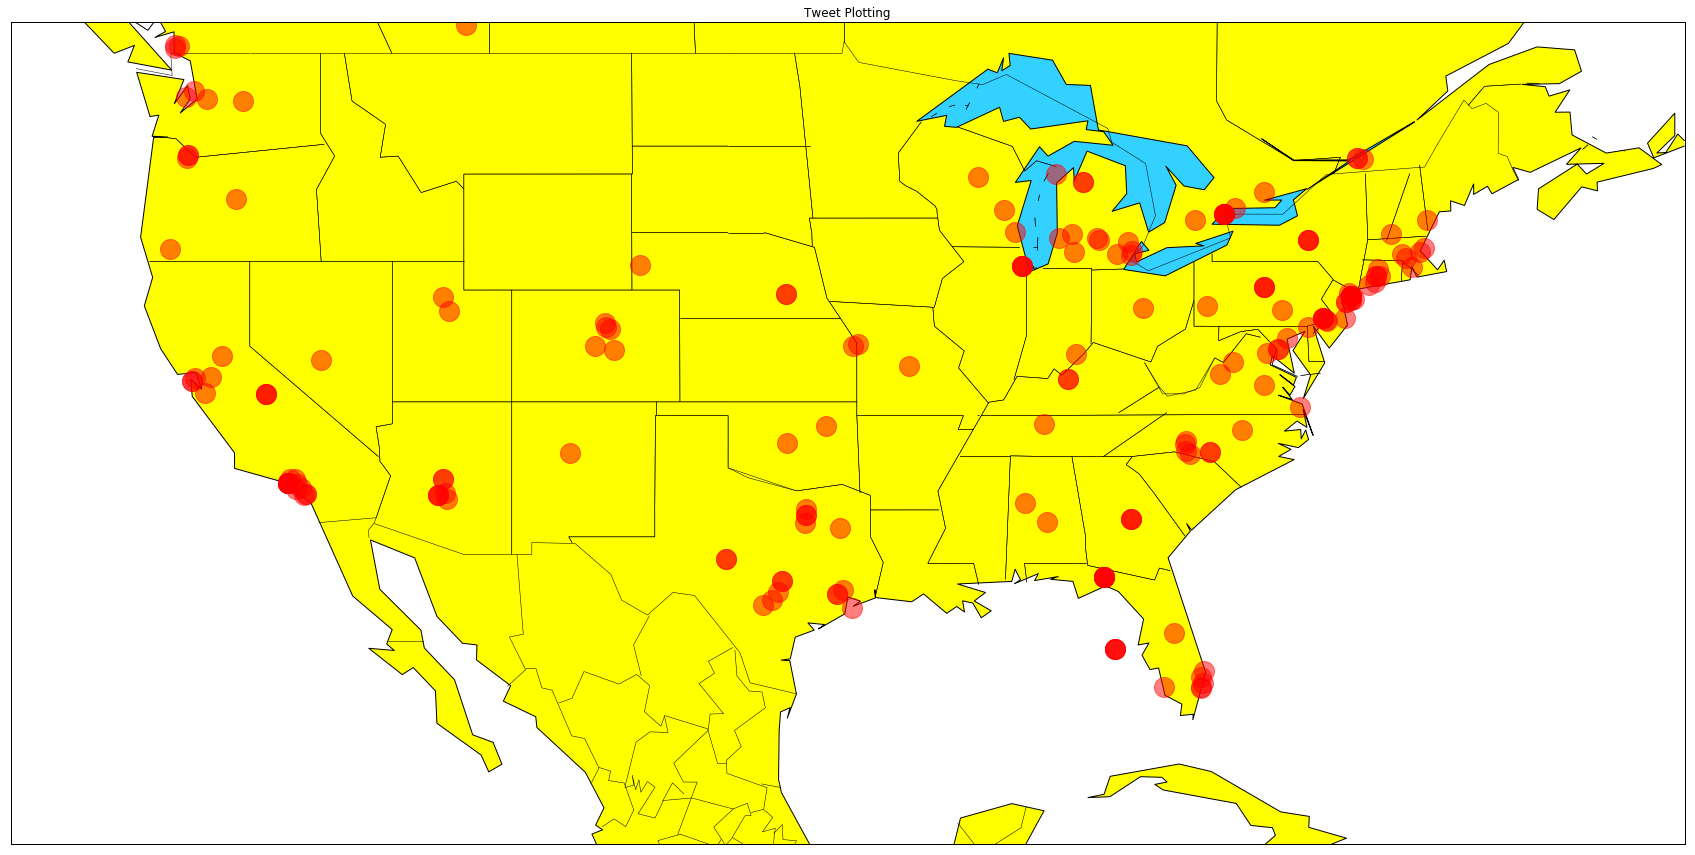

In [73]:
plt.figure(figsize=(30,30))
m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-130,urcrnrlon=-60,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='#FFFF00', lake_color='#33D1FF')
m.drawmapboundary(fill_color='#FFFFFF')

lat = lat_add
lon = long_add

x,y = m(lon,lat)
m.plot(x,y,'ro',markersize=20,alpha=.5)


plt.title('Tweet Plotting')
plt.show()


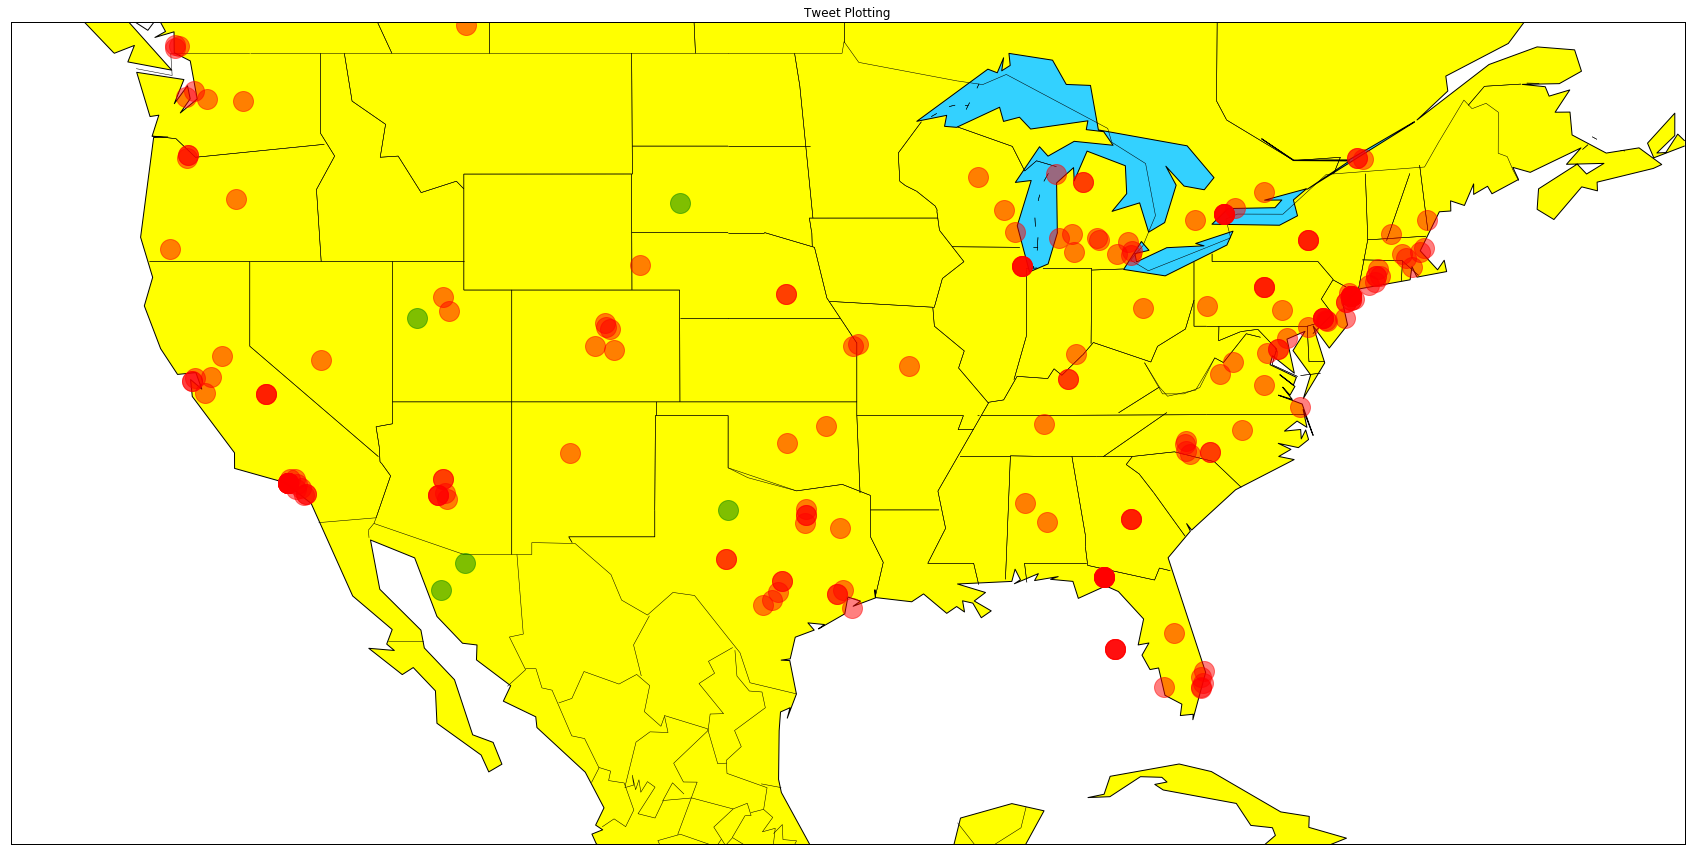

In [83]:
lat2 = 40,33,44,31,30
lon2 = -113,-100,-102,-111,-112

plt.figure(figsize=(30,30))
m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-130,urcrnrlon=-60,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='#FFFF00', lake_color='#33D1FF')
m.drawmapboundary(fill_color='#FFFFFF')

lat = lat_add
lon = long_add

x,y = m(lon,lat)
m.plot(x,y,'ro',markersize=20,alpha=.5)

x2,y2 = m(lon2,lat2)
m.plot( x2,y2,'go',markersize=20,alpha=.5)


plt.title('Tweet Plotting')
plt.show()

In [102]:
lat2 = [40,33,44,31,30]
lon2 = [-113,-100,-102,-111,-112]




In [108]:
import geopy.distance

dist = []
for n in np.arange(tweet_clean.shape[0]):

    coords_1 = (tweet_clean.lat[n], tweet_clean.long[n])
    coords_2 = (52.406374, 16.9251681)


    dist.append(geopy.distance.vincenty(coords_1, coords_2).km)
    
dist

[6801.930656183141,
 7477.252380678281,
 6945.069086261537,
 7312.289558412401,
 7421.346110354691,
 8876.574670793654,
 7151.557788564808,
 6345.729296098702,
 9258.077828921541,
 7274.892262686468,
 9275.431774351724,
 6890.524415118756,
 15838.573149041153,
 7312.289558412401,
 6743.355291133985,
 6622.099418925336,
 6613.814621090764,
 6743.355291133985,
 6484.867444114301,
 7149.808233684588,
 6566.338260584322,
 8475.3948447489,
 9133.077181933691,
 7312.289558412401,
 6640.885226025612,
 6640.885226025612,
 8619.709569771028,
 238.19661991953814,
 1126.095847524116,
 7057.69300172886,
 8919.183087468658,
 6299.1012672367815,
 9496.523005107118,
 6781.60310100827,
 9496.523005107118,
 8261.227301303514,
 6218.892650176183,
 1337.6605109620668,
 6492.67570872277,
 6613.453774886025,
 6492.67570872277,
 6613.453774886025,
 8297.285460631254,
 9205.435497417357,
 8091.0685365632335,
 8218.276747716634,
 6743.355291133985,
 6969.598663184932,
 7869.221407078306,
 8790.313414550881,
 